## First Method : Using SciPy

**Step 1. Import all necessary packages**

In [ ]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Step 2. Load audio file**

In [ ]:
samplerate, data = wavfile.read('SM7_F20_H092.wav')
print('Sample rate of the signal:',samplerate,"Hz")
print('Contents of the signal:',data)
print('Length of the signal:',len(data))

Sample rate of the signal: 44100 Hz
Contents of the signal: [-3494 -3489 -3382 ...   228   187    98]
Length of the signal: 132456


In [ ]:
# ! pip install pydub

In [ ]:
from pydub import AudioSegment
import IPython

IPython.display.Audio(data,rate=samplerate)

In [ ]:
times = np.arange(len(data))/float(samplerate) # Calculate the duration of the signal

# How times is different from data?
print('Minimum time (sec):', min(times))
print('Maximum time (sec):', max(times))
print('Minimum data point value:', min(data))
print('Maximum data point value:', max(data))

duration = len(data)/float(samplerate)

print('Duration of the audio in seconds: {:.2f}'.format(duration))

print('Number of samples:',len(data))

Minimum time (sec): 0.0
Maximum time (sec): 3.003514739229025
Minimum data point value: -8922
Maximum data point value: 12540
Duration of the audio in seconds: 3.00
Number of samples: 132456


**Step 3. Plot the raw signal (i.e. audio waveform)**

This is a time domain representation of an audio signal, where only time and corresponding amplitude information is available. This kind of representation does not provide much information.

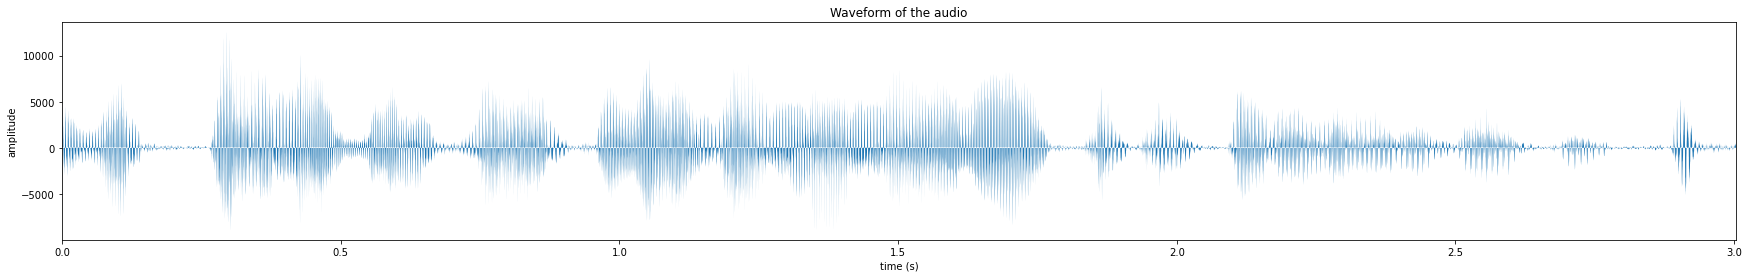

In [ ]:
# Time domain representation
# Make the plot

plt.figure(figsize=(30, 4))

plt.fill_between(times, data)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.xlim(times[0],times[-1])
plt.title('Waveform of the audio')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot_scipy_audio.png', dpi=300)
plt.show()

**Step 4. Plot Frequency Spectrum**

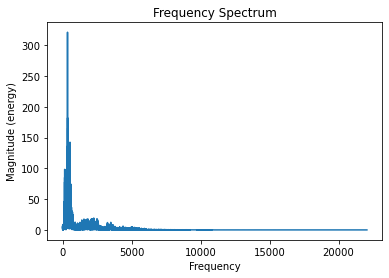

In [ ]:
[a,b,c] = plt.magnitude_spectrum(data,Fs=samplerate)

plt.title('Frequency Spectrum')
plt.show()

# Second Method : Using Librosa

In [ ]:
# !pip install numba --upgrade
# !pip install librosa

In [ ]:
import librosa

audio_path = 'SM7_F20_H092.wav'

x , sr = librosa.load(audio_path)

print("Sample rate:",sr)
print("Duration of the signal in seconds: {:.2f}".format(len(x)/sr))

C:\Users\Umair\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Sample rate: 22050
Duration of the signal in seconds: 3.00


In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

**Visualizing audio files**

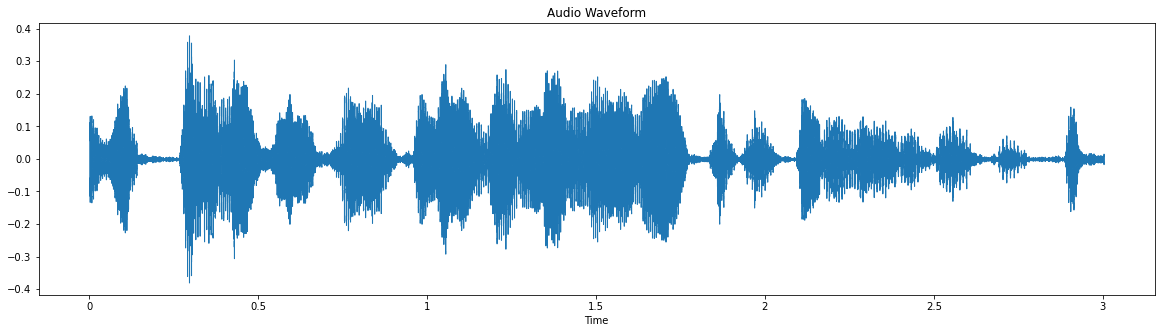

In [ ]:
import librosa.display

plt.figure(figsize=(20, 5))
plt.title('Audio Waveform')
librosa.display.waveshow(x, sr=sr)

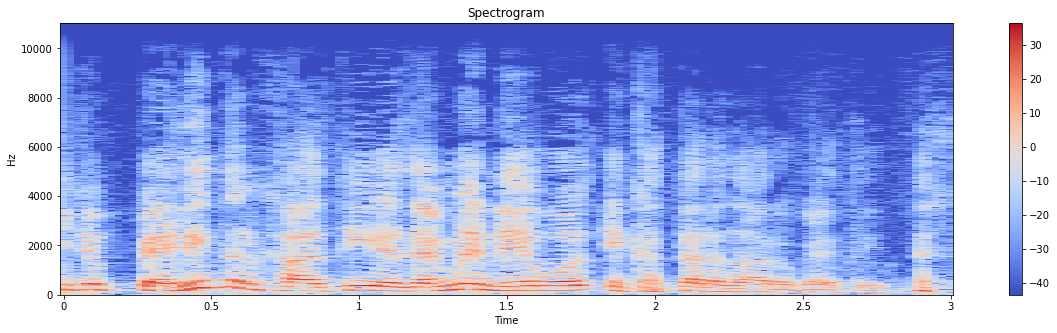

In [ ]:
# This is spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram')
plt.colorbar()

In [ ]:
import soundfile as sf

In [ ]:
X, sample_rate = sf.read('SM7_F20_H092.wav', dtype='float32')
len(X)

132456

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(X, sr=sample_rate, hop_length=hop_length)
len(chromagram[0])

C:\Users\Umair\AppData\Local\Temp/ipykernel_6712/1348805892.py:2: FutureWarning: Pass y=[-0.10662842 -0.10647583 -0.10321045 ...  0.00695801  0.00570679
  0.00299072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(X, sr=sample_rate, hop_length=hop_length)


259

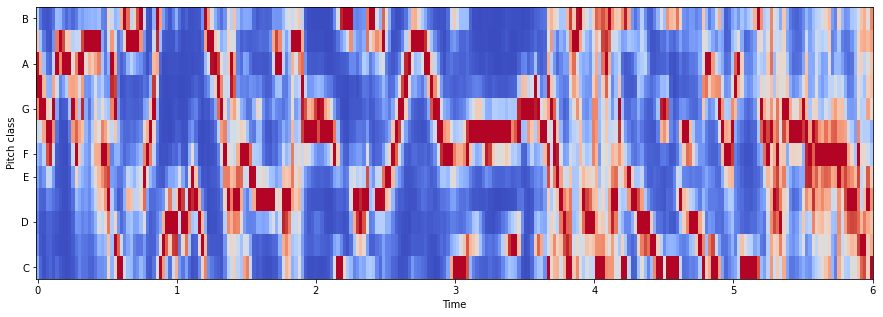

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [ ]:
# Applying Short Term Fourier Transform
stft = np.abs(librosa.stft(X))
print (len(stft))

1025


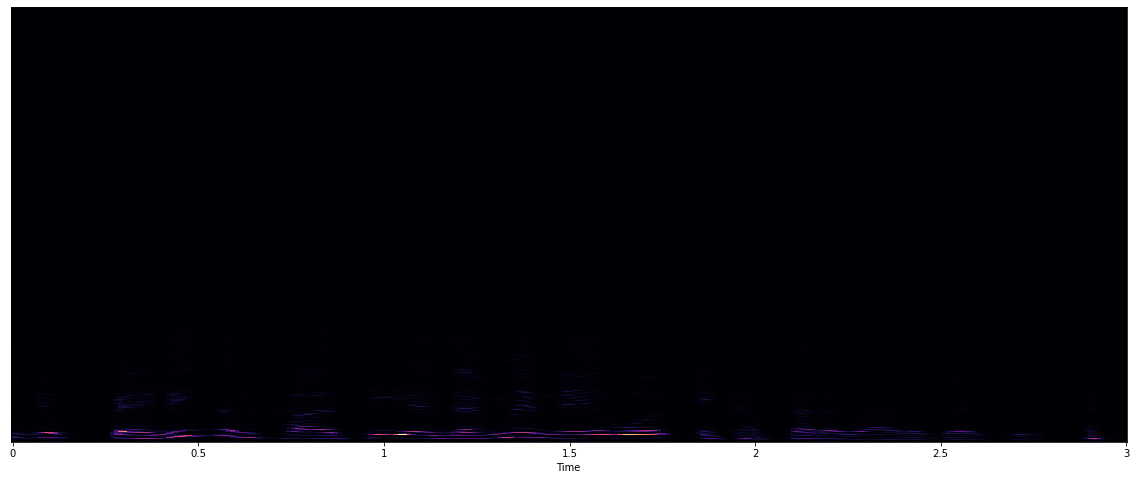

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(stft, sr=sample_rate, x_axis='time')

In [ ]:
MFCC_Features = librosa.feature.mfcc(y=X, sr=sample_rate)
print (len(MFCC_Features))

20


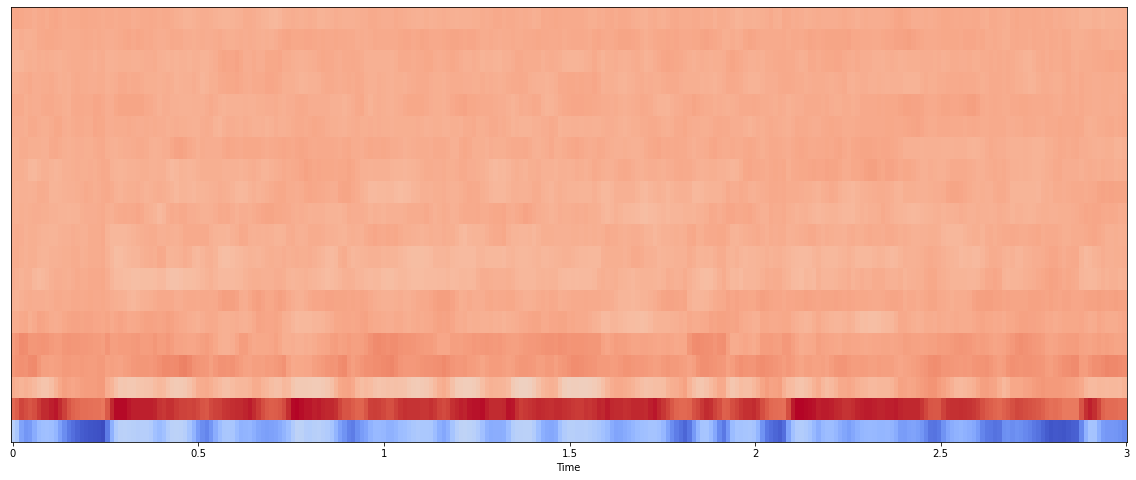

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(MFCC_Features, sr=sample_rate, x_axis='time')